In [1]:
from keras.datasets import mnist
import seaborn as sns
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

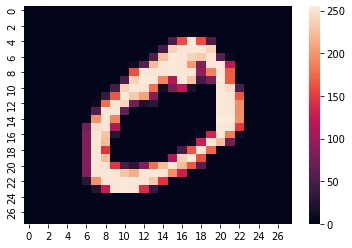

In [2]:
sns.heatmap(train_data[1, :, :])
plt.show()

In [3]:
train_data = train_data.reshape((60000, 28*28))
test_data = test_data.reshape((10000, 28*28))
num_classes = 10
train_labels = to_categorical(train_labels,num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [4]:
train_data.shape

(60000, 784)

In [5]:
train_data = train_data /255
test_data = test_data /255

## Overview of almost all regulizers and on which parameters you can apply them
*Regularizers* allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.

Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.

These layers expose 3 keyword arguments:

kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
bias_regularizer: Regularizer to apply a penalty on the layer's bias
activity_regularizer: Regularizer to apply a penalty on the layer's output


```python
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)
```

Further ressources: https://artemoppermann.com/de/regularisierung-in-deep-learning-l1-l2-und-dropout/

In [88]:
from keras import Sequential, Input, layers
from keras.regularizers import L1, L2
import tensorflow as tf
model = Sequential([
    Input(shape = (784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation = "relu", name="HiddenLayer_1"),
    #layers.Dropout(0.1),
    layers.Dense(128, activation = "relu", name="HiddenLayer_2"),
    layers.Dense(128, activation = "relu", name="HiddenLayer_3"),
    layers.Dense(128, activation = "relu", name="HiddenLayer_4", kernel_regularizer=L2(0.01)),
    layers.Dense(128, activation = "relu", name="HiddenLayer_5"),
    layers.Dense(10, activation = "softmax", name="OutputLayer"),
], name="MNISTClassification")

model_L1_L2_1Do = Sequential([
    Input(shape = (784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation = "relu", name="HiddenLayer_1"),
    #layers.Dropout(0.1),
    layers.Dense(128, activation = "relu", name="HiddenLayer_2", kernel_regularizer=L1(0.02)),
    layers.Dense(128, activation = "relu", name="HiddenLayer_3"),
    layers.Dense(128, activation = "relu", name="HiddenLayer_4", kernel_regularizer=L2(0.01)),
    layers.Dense(128, activation = "relu", name="HiddenLayer_5"),
    layers.Dense(10, activation = "softmax", name="OutputLayer"),
], name="MNISTClassification_2")

model_1L2_2Do = Sequential([
    Input(shape = (784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation = "relu", name="HiddenLayer_1"),
    layers.Dense(128, activation = "relu", name="HiddenLayer_2"),
    layers.Dropout(0.1),
    layers.Dense(128, activation = "relu", name="HiddenLayer_3"),
    layers.Dense(128, activation = "relu", name="HiddenLayer_4", kernel_regularizer=L2(0.01)),
    layers.Dense(128, activation = "relu", name="HiddenLayer_5"),
    layers.Dense(10, activation = "softmax", name="OutputLayer"),
], name="MNISTClassification_3")
model.summary()

Model: "MNISTClassification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_20 (Dropout)        (None, 784)               0         
                                                                 
 HiddenLayer_1 (Dense)       (None, 128)               100480    
                                                                 
 HiddenLayer_2 (Dense)       (None, 128)               16512     
                                                                 
 HiddenLayer_3 (Dense)       (None, 128)               16512     
                                                                 
 HiddenLayer_4 (Dense)       (None, 128)               16512     
                                                                 
 HiddenLayer_5 (Dense)       (None, 128)               16512     
                                                                 
 OutputLayer (Dense)         (None, 10)        

In [89]:
import numpy as np
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss = CategoricalCrossentropy(),
    metrics = ["acc"]
)

history =model.fit(train_data.astype(np.float32), train_labels, batch_size=64, epochs=40, validation_split=0.1)

model_L1_L2_1Do.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss = CategoricalCrossentropy(),
    metrics = ["acc"]
)

history_L1_L2 =model_L1_L2_1Do.fit(train_data.astype(np.float32), train_labels, batch_size=64, epochs=40, validation_split=0.1)

model_1L2_2Do.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss = CategoricalCrossentropy(),
    metrics = ["acc"]
)

history_1L2_2Do =model_1L2_2Do.fit(train_data.astype(np.float32), train_labels, batch_size=64, epochs=40, validation_split=0.1)

Epoch 1/40
844/844 [==============================] - 5s 4ms/step - loss: 1.6382 - acc: 0.7549 - val_loss: 0.8571 - val_acc: 0.9225
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.8408 - acc: 0.8893 - val_loss: 0.5990 - val_acc: 0.9428
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.6378 - acc: 0.9112 - val_loss: 0.4677 - val_acc: 0.9547
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 0.5170 - acc: 0.9246 - val_loss: 0.3735 - val_acc: 0.9610
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.4357 - acc: 0.9322 - val_loss: 0.3182 - val_acc: 0.9633
Epoch 6/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3743 - acc: 0.9386 - val_loss: 0.2783 - val_acc: 0.9635
Epoch 7/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3282 - acc: 0.9428 - val_loss: 0.2328 - val_acc: 0.9697
Epoch 8/40
844/844 [==============================] - 3s 4ms/step - loss: 0.

In [90]:
history_dict_0 = history.history
history_dict_1 = history_L1_L2.history
history_dict_2 = history_1L2_2Do.history
history_dict_0.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

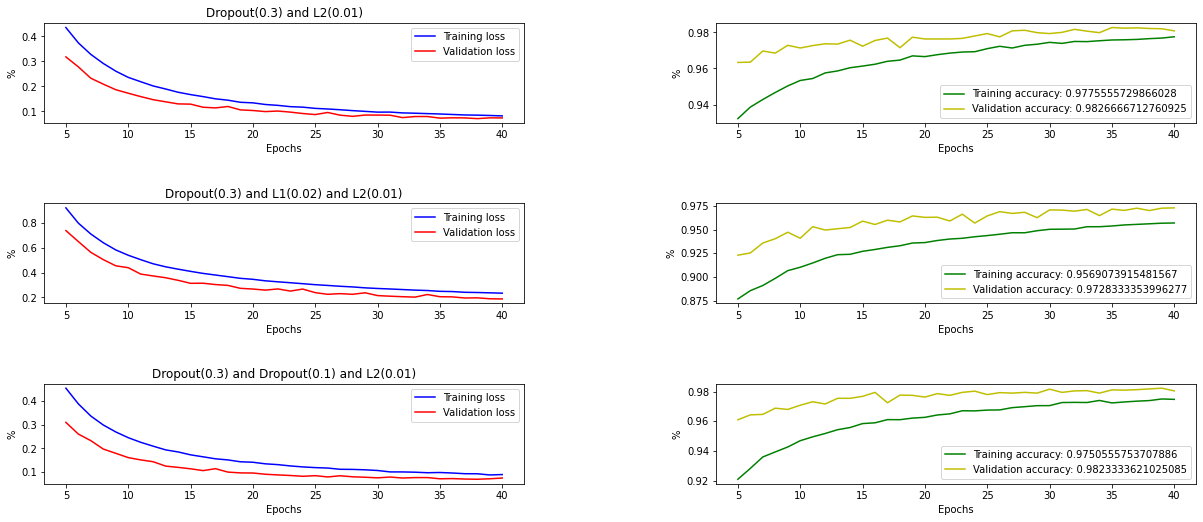

In [99]:
import matplotlib.pyplot as plt
import numpy as np
loss_values = history_dict_0["loss"]
acc_values = history_dict_0["acc"]
val_loss = history_dict_0["val_loss"]
loss_acc = history_dict_0["val_acc"]
high_acc1 = acc_values[np.argmax(acc_values)]
high_loss1 = loss_acc[np.argmax(loss_acc)]

loss_values_L1L2 = history_dict_1["loss"]
acc_values_L1L2 = history_dict_1["acc"]
val_loss_L1L2 = history_dict_1["val_loss"]
loss_acc_L1L2 = history_dict_1["val_acc"]
high_acc2 = acc_values_L1L2[np.argmax(acc_values_L1L2)]
high_loss2 = loss_acc_L1L2[np.argmax(loss_acc_L1L2)]

loss_values_L2Do = history_dict_2["loss"]
acc_values_L2Do = history_dict_2["acc"]
val_loss_L2Do = history_dict_2["val_loss"]
loss_acc_L2Do = history_dict_2["val_acc"]
high_acc3 = acc_values_L2Do[np.argmax(acc_values_L2Do)]
high_loss3 = loss_acc_L2Do[np.argmax(loss_acc_L2Do)]


fig, ax = plt.subplots(3,2, figsize=(20, 8))
epochs = range(5,len(loss_values)+ 1)
ax[0][0].plot(epochs, loss_values[4:], "b", label="Training loss")
ax[0][0].plot(epochs, val_loss[4:], "r", label="Validation loss")
ax[0][0].set_xlabel("Epochs")
ax[0][0].set_ylabel("%")
ax[0][0].set_title("Dropout(0.3) and L2(0.01)")
ax[0][0].legend()
ax[0][1].plot(epochs, acc_values[4:], "g", label="Training accuracy: " + str(high_acc1))
ax[0][1].plot(epochs, loss_acc[4:], "y", label="Validation accuracy: " + str(high_loss1))
ax[0][1].set_xlabel("Epochs")
ax[0][1].set_ylabel("%")
ax[0][1].legend()

ax[1][0].plot(epochs, loss_values_L1L2[4:], "b", label="Training loss")
ax[1][0].plot(epochs, val_loss_L1L2[4:], "r", label="Validation loss")
ax[1][0].set_xlabel("Epochs")
ax[1][0].set_ylabel("%")
ax[1][0].set_title("Dropout(0.3) and L1(0.02) and L2(0.01)")
ax[1][0].legend()
ax[1][1].plot(epochs, acc_values_L1L2[4:], "g", label="Training accuracy: " + str(high_acc2))
ax[1][1].plot(epochs, loss_acc_L1L2[4:], "y", label="Validation accuracy: " + str(high_loss2))
ax[1][1].set_xlabel("Epochs")
ax[1][1].set_ylabel("%")
ax[1][1].legend()

ax[2][0].plot(epochs, loss_values_L2Do[4:], "b", label="Training loss")
ax[2][0].plot(epochs, val_loss_L2Do[4:], "r", label="Validation loss")
ax[2][0].set_xlabel("Epochs")
ax[2][0].set_ylabel("%")
ax[2][0].set_title("Dropout(0.3) and Dropout(0.1) and L2(0.01)")
ax[2][0].legend()
ax[2][1].plot(epochs, acc_values_L2Do[4:], "g", label="Training accuracy: " + str(high_acc3))
ax[2][1].plot(epochs, loss_acc_L2Do[4:], "y", label="Validation accuracy: " + str(high_loss3))
ax[2][1].set_xlabel("Epochs")
ax[2][1].set_ylabel("%")
ax[2][1].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

1/1 [==============================] - 0s 150ms/step
Predicted truth: 1 with a accuracy of: 99.92910623550415%
Ground truth:  1


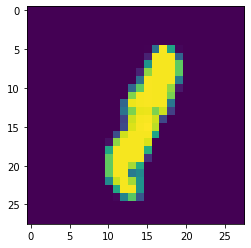

1/1 [==============================] - 0s 31ms/step
Predicted truth: 1 with a accuracy of: 99.63868856430054%
Ground truth:  1


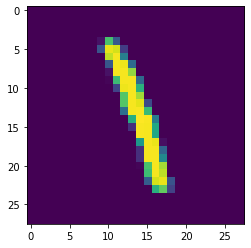

1/1 [==============================] - 0s 35ms/step
Predicted truth: 0 with a accuracy of: 99.99258518218994%
Ground truth:  0


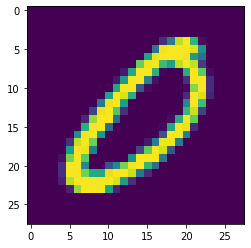

1/1 [==============================] - 0s 37ms/step
Predicted truth: 9 with a accuracy of: 99.88549947738647%
Ground truth:  9


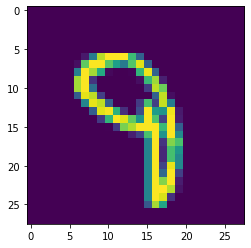

1/1 [==============================] - 0s 35ms/step
Predicted truth: 0 with a accuracy of: 99.95518326759338%
Ground truth:  0


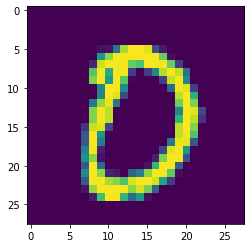

1/1 [==============================] - 0s 29ms/step
Predicted truth: 3 with a accuracy of: 92.01861023902893%
Ground truth:  3


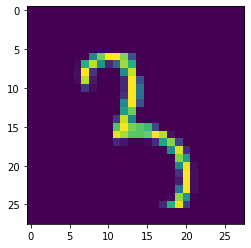

1/1 [==============================] - 0s 28ms/step
Predicted truth: 1 with a accuracy of: 99.98773336410522%
Ground truth:  1


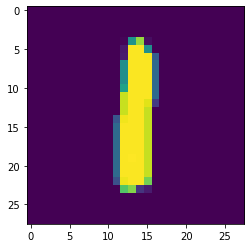

1/1 [==============================] - 0s 34ms/step
Predicted truth: 6 with a accuracy of: 99.99583959579468%
Ground truth:  6


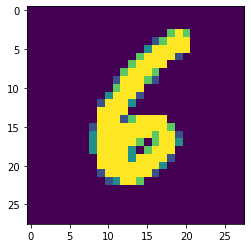

In [75]:
from random import randint
value = randint(0, 200)
for i in range(value,value+8):
    test_img = test_data[i,:].reshape(28,28)
    #sns.heatmap(test_img)
    plt.imshow(test_img)
    test_img = test_img.reshape(1,784)
    pred = model.predict(test_img)
    print("Predicted truth: " + str(np.argmax(pred, axis=1)[0])+  " with a accuracy of: " + str(pred[0][np.argmax(pred)]*100) + "%")
    print("Ground truth: ", np.argmax(test_labels[i]))
    plt.show()
